In [ ]:
pip install tensorflow


In [12]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [13]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


11490434/11490434 [==============================] - 0s 0us/step


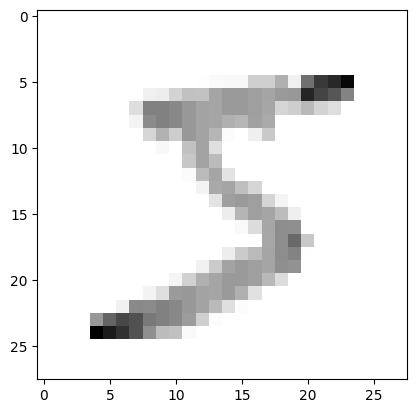

In [14]:
def draw(n):
	plt.imshow(n,cmap=plt.cm.binary)
	plt.show()

draw(x_train[0])


Step 4 : make a neural network and train it

In [15]:
#there are two types of models
#sequential is most common, why?

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']
			)
model.fit(x_train,y_train,epochs=3)


Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2689 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1109 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9762


Step 5 : check model accuracy and loss

In [16]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9712
loss->  0.09217547625303268 
acc->  0.9711999893188477


Step 6 : prediction using model

313/313 [==============================] - 1s 2ms/step
label ->  1
prediction ->  1


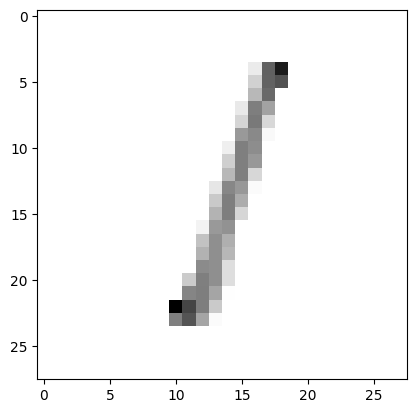

In [17]:
predictions=model.predict([x_test])
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])


saving the model

In [18]:
#saving the model
# .h5 or .model can be used

model.save('epic_num_reader.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


prediction using new model